# Библиотеки

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import seaborn as sns
import numpy as np
import pickle

# Загрузка данных и знакомство с ними

In [2]:
df = pd.read_csv('../data/train.csv')
print("Размер датасета:", df.shape)

Размер датасета: (2000, 21)


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
battery_power,2000.0,1238.51850,439.418206,501.0,851.75,1226.0,1615.25,1998.0
blue,2000.0,0.49500,0.500100,0.0,0.00,0.0,1.00,1.0
clock_speed,2000.0,1.52225,0.816004,0.5,0.70,1.5,2.20,3.0
dual_sim,2000.0,0.50950,0.500035,0.0,0.00,1.0,1.00,1.0
fc,2000.0,4.30950,4.341444,0.0,1.00,3.0,7.00,19.0
four_g,2000.0,0.52150,0.499662,0.0,0.00,1.0,1.00,1.0
int_memory,2000.0,32.04650,18.145715,2.0,16.00,32.0,48.00,64.0
m_dep,2000.0,0.50175,0.288416,0.1,0.20,0.5,0.80,1.0
mobile_wt,2000.0,140.24900,35.399655,80.0,109.00,141.0,170.00,200.0
n_cores,2000.0,4.52050,2.287837,1.0,3.00,4.0,7.00,8.0


In [6]:
print(df['price_range'].value_counts())

price_range
1    500
2    500
3    500
0    500
Name: count, dtype: int64


In [6]:
numeric_features = ['battery_power', 'clock_speed', 'fc', 'int_memory', 'm_dep', 
                   'mobile_wt', 'n_cores', 'pc', 'px_height', 'px_width', 'ram', 
                   'sc_h', 'sc_w', 'talk_time']

categorical_features = ['blue', 'dual_sim', 'four_g', 'three_g', 'touch_screen', 'wifi']

target = 'price_range'

In [ ]:
for clm in categorical_features:
    df[clm] = df[clm].astype('category')

In [10]:
len(categorical_features)

6

**выводы**: Датасет содержит 2000 строк и 21 столбец, нет пропущенных значений, целевая переменная price_range имеет 4 категории (0, 1, 2, 3), распределенных равномерно

# Очистка данных

In [3]:
df = df[df['battery_power'] != 0]
df = df[df['clock_speed'] != 0]
df = df[df['int_memory'] != 0]
df = df[df['m_dep'] != 0]

df = df[df['mobile_wt'] > 50]
df = df[df['px_height'] >= 50]
df = df[df['px_width'] >= 20]
df = df[df['sc_w'] < df['sc_h']]

In [4]:
df.shape

(1935, 21)

**вывод:** было очищено 65 строк с невалидными значениями

# Анализ признаков для модели

In [7]:
fig = go.Figure()

for col in numeric_features:
    fig.add_trace(go.Box(y=df[col], name=col))

fig.update_layout(
    title='Ящик с усами',
    xaxis_tickangle=-45,
    width=1500,
    height=800
)

fig.write_image('numeric_features_boxplot.png')

fig.show()

**вывод**: 
1) Наибольший разброс значений наблюдается у ram, px_height, px_width, battery_power.
2) выбросы имеются у px_height, fc
3) признаки имеют разный маштаб

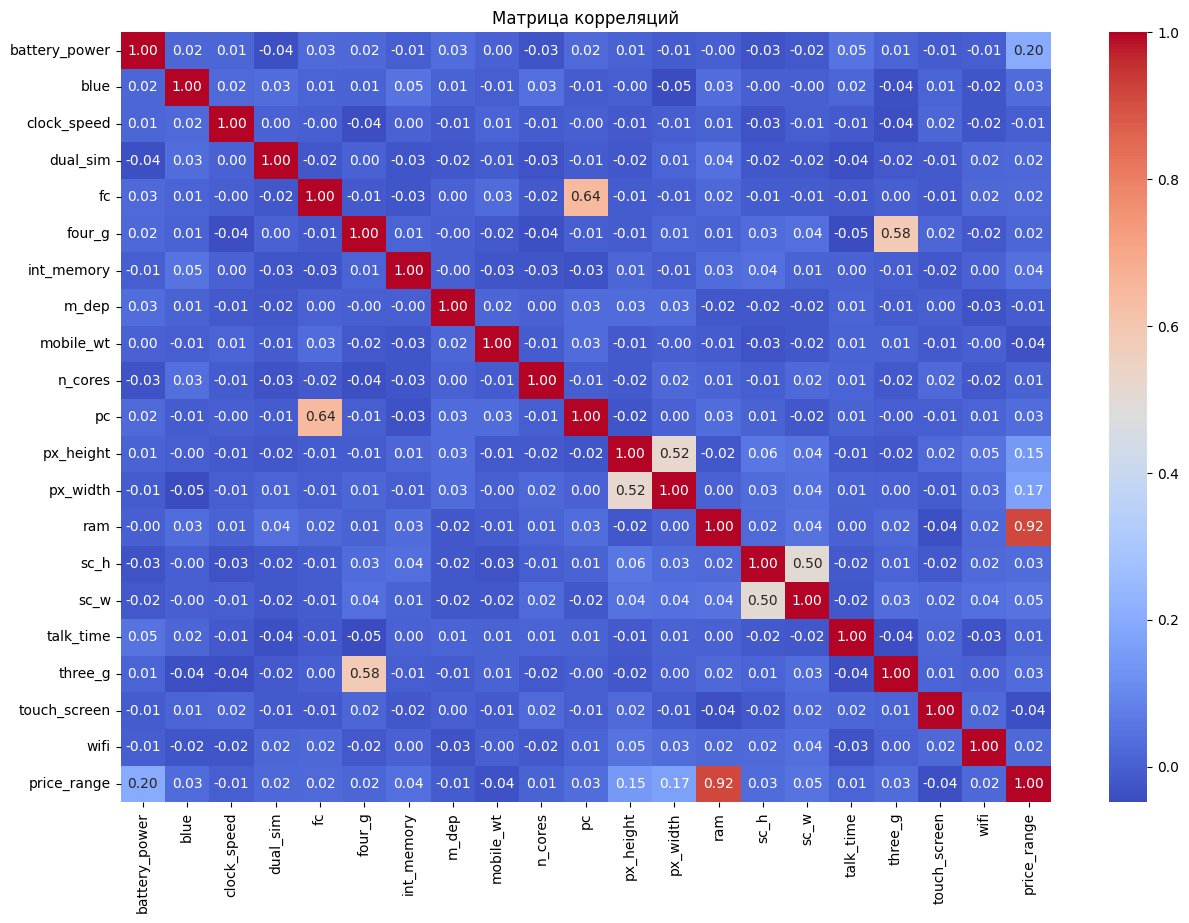

In [11]:
plt.figure(figsize=(15, 10))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Матрица корреляций')
plt.savefig('CorrelationHeatmap.png')
plt.show()

**вывод**:
Наибольшая корреляция с целевой переменной (price_range) наблюдается у RAM (0.92), battery_power (0.2), px_height (0.15) и px_width (0.17).

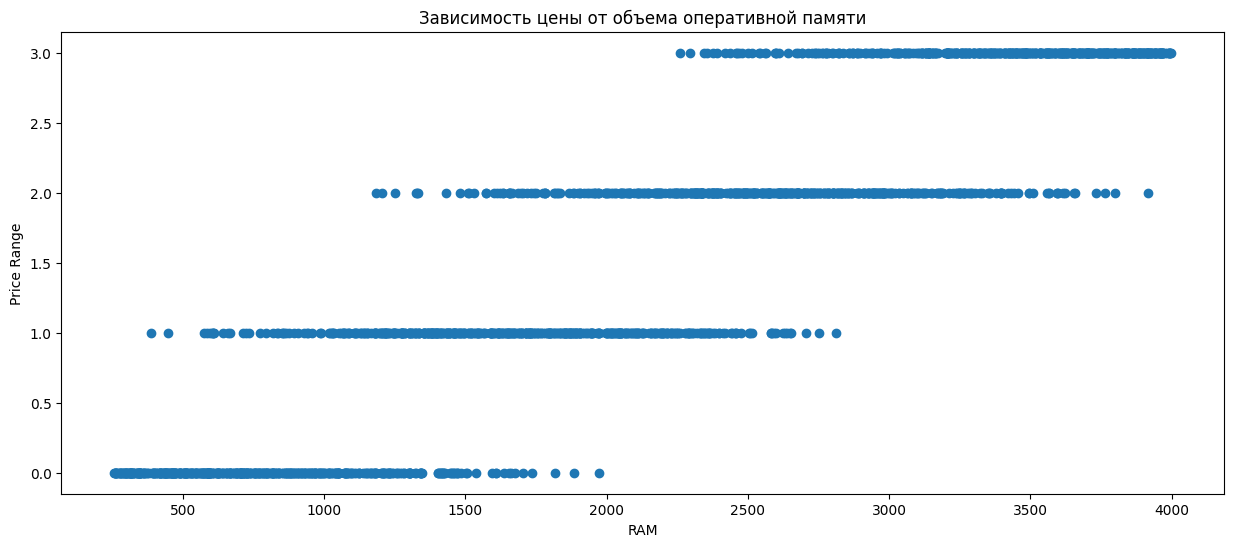

In [12]:
plt.figure(figsize=(15, 6))
plt.scatter(df['ram'], df['price_range'])
plt.title('Зависимость цены от объема оперативной памяти')
plt.xlabel('RAM')
plt.ylabel('Price Range')
plt.savefig('ram_vs_price.png')
plt.show()

**вывод** на графике видно разделение ram по классам. С увеличением ram меняется номер класса

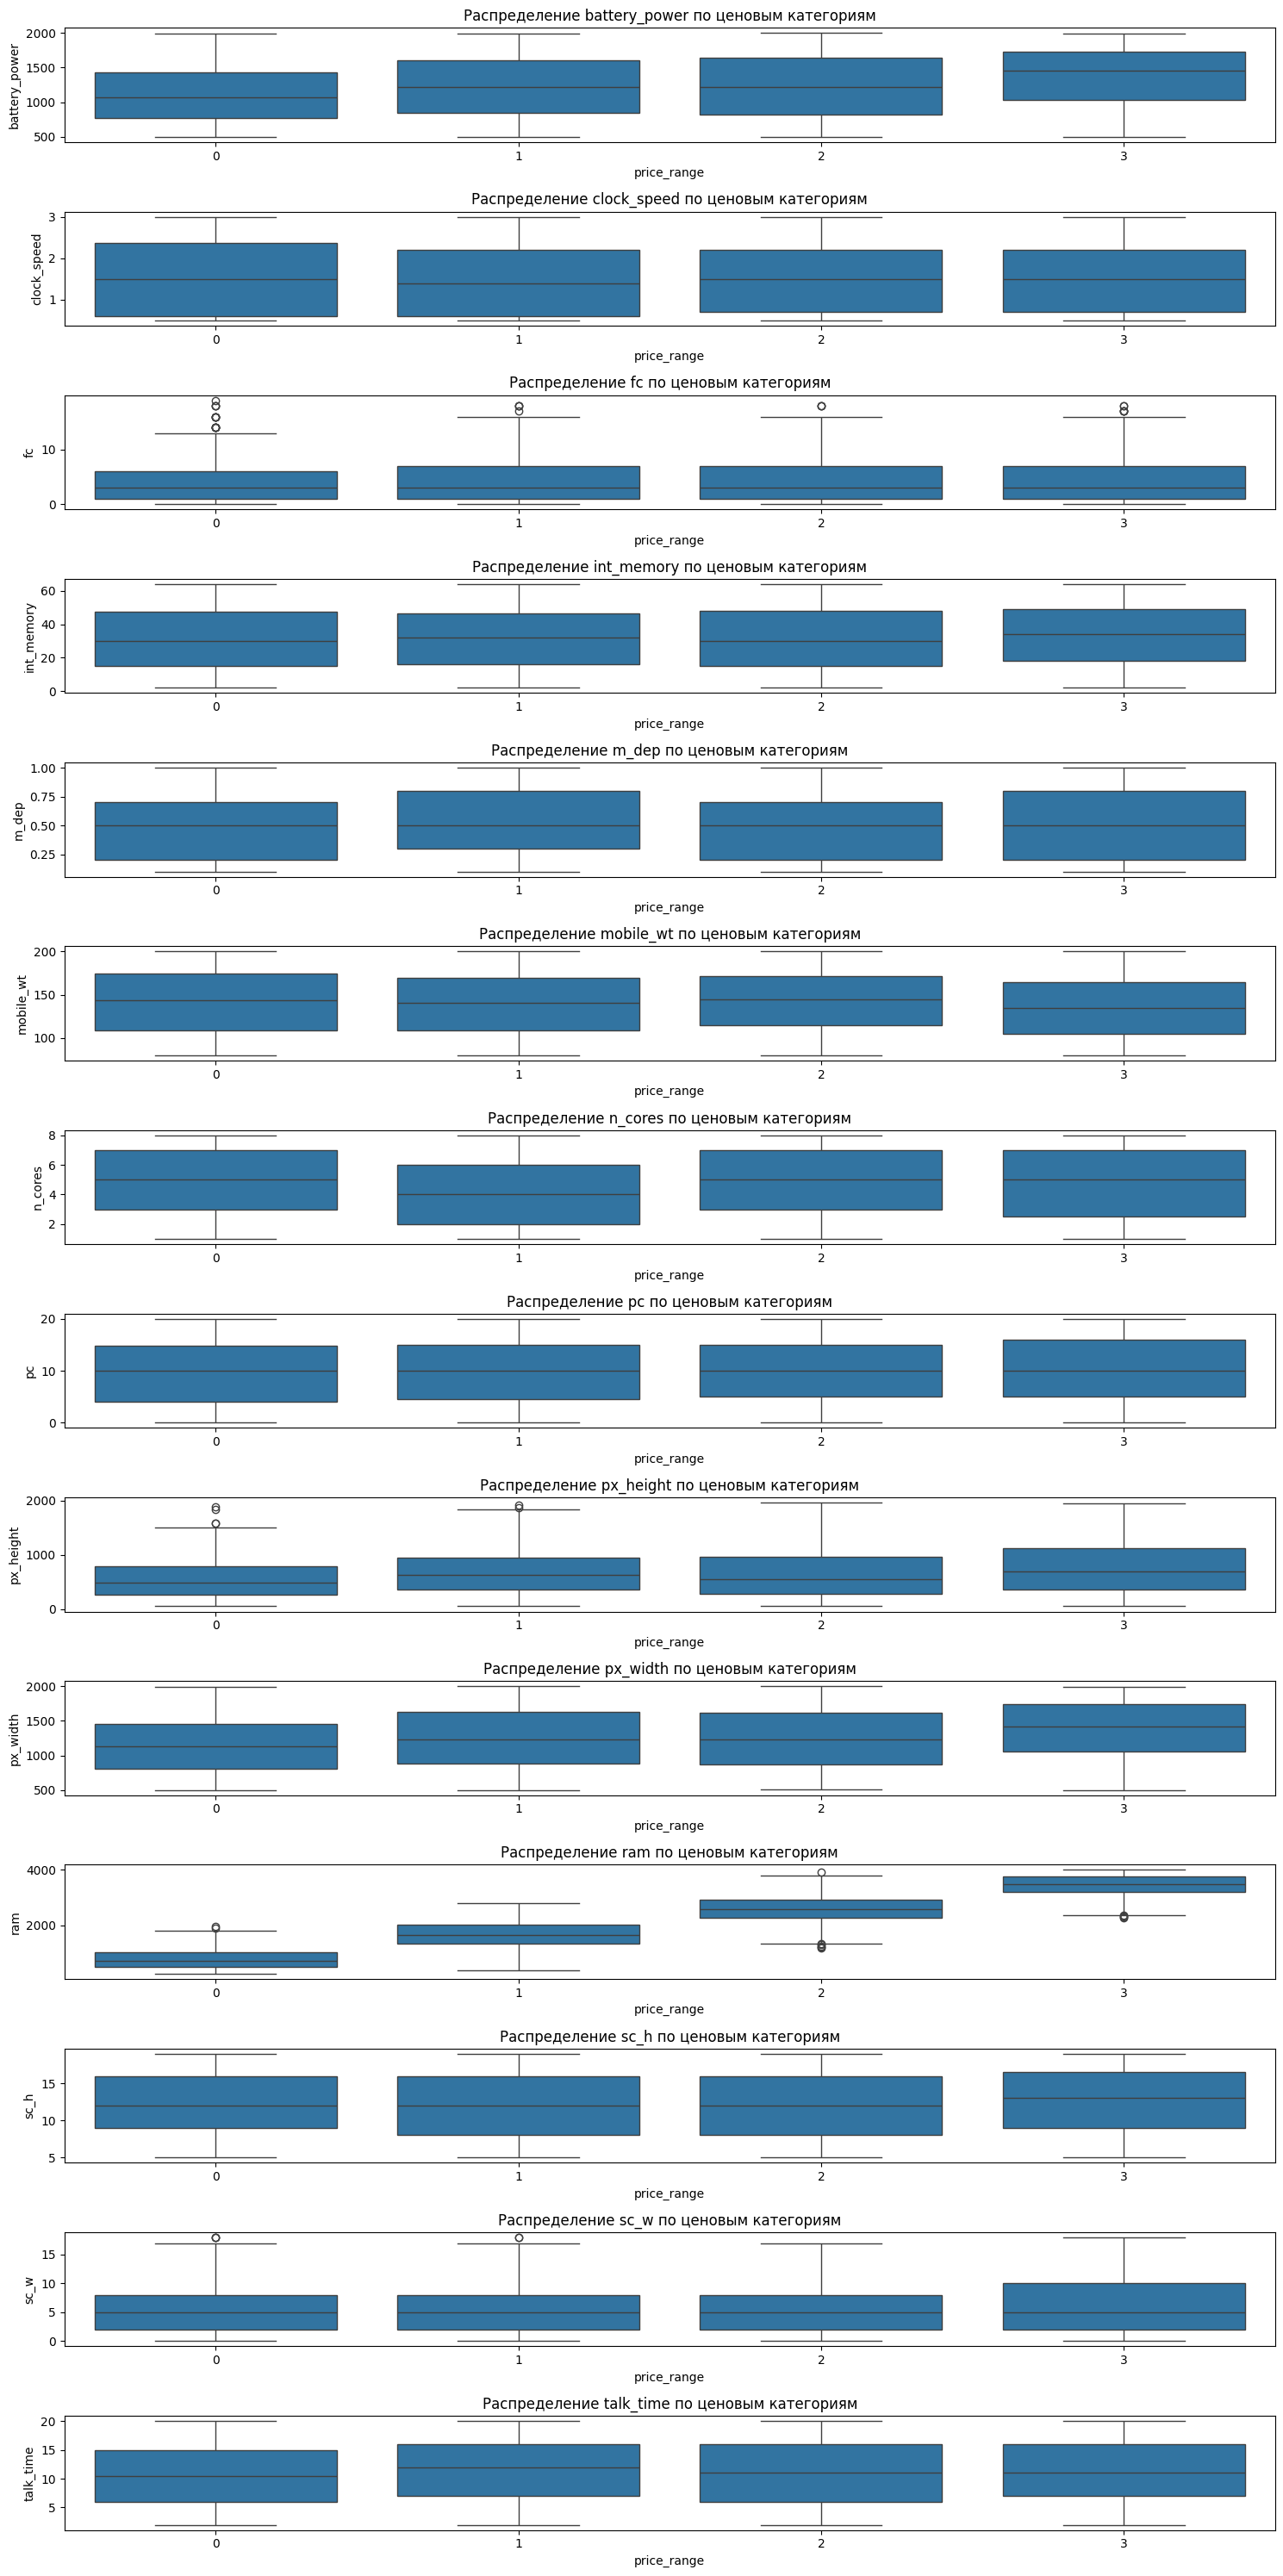

In [13]:
fig, axes = plt.subplots(14, 1, figsize=(15, 30))


for i, clm in enumerate(numeric_features):
    sns.boxplot(data=df, x='price_range', y=clm, ax=axes[i])
    axes[i].set_title(f'Распределение {clm} по ценовым категориям')

plt.tight_layout()
plt.savefig('features_by_price.png')
plt.show()



На графике показано распределение числовых переменных (ящик с усами) по классам

**вывод:**
1) battery_power - отличаются медианные значения класса 0 и 3
2) m_dep - для класса 4 ящиек больше чем у остальных классов
3) n_cores - медианное значение для класса 1 ниже чем для остальных классов
4) px_height - медианное значение классов 0,2 ниже чем для 1,3
5) px_width - для класса 0 медианные значения ниже класса 1 и 2. Для класса 3 медианное значение больше всего
6) talk_time - медианное значение для класса 1 больше чем для остальных

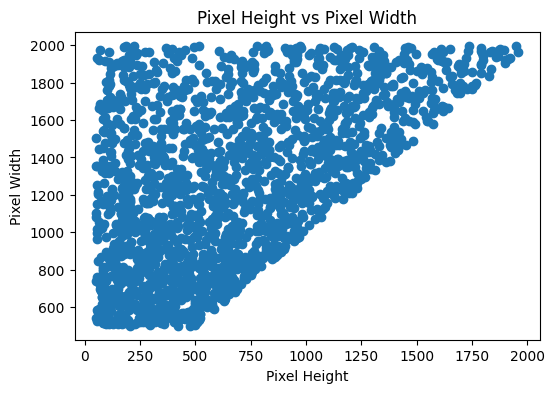

In [14]:
plt.figure(figsize=(6, 4))
plt.scatter(df['px_height'], df['px_width'])
plt.title('Pixel Height vs Pixel Width')
plt.xlabel('Pixel Height')
plt.ylabel('Pixel Width')
plt.savefig('px_height_vs_px_width.png', dpi=300, bbox_inches='tight')
plt.show()

**вывод:** 
1) наблюдается четкая положительная линейная зависимость между высотой (px_height) и шириной (px_width) пикселей экрана
2) Пропорциональное масштабирование: увеличиваются оба измерения одновременно для сохранения соотношения сторон (есть выбросы)



# Новые признаки

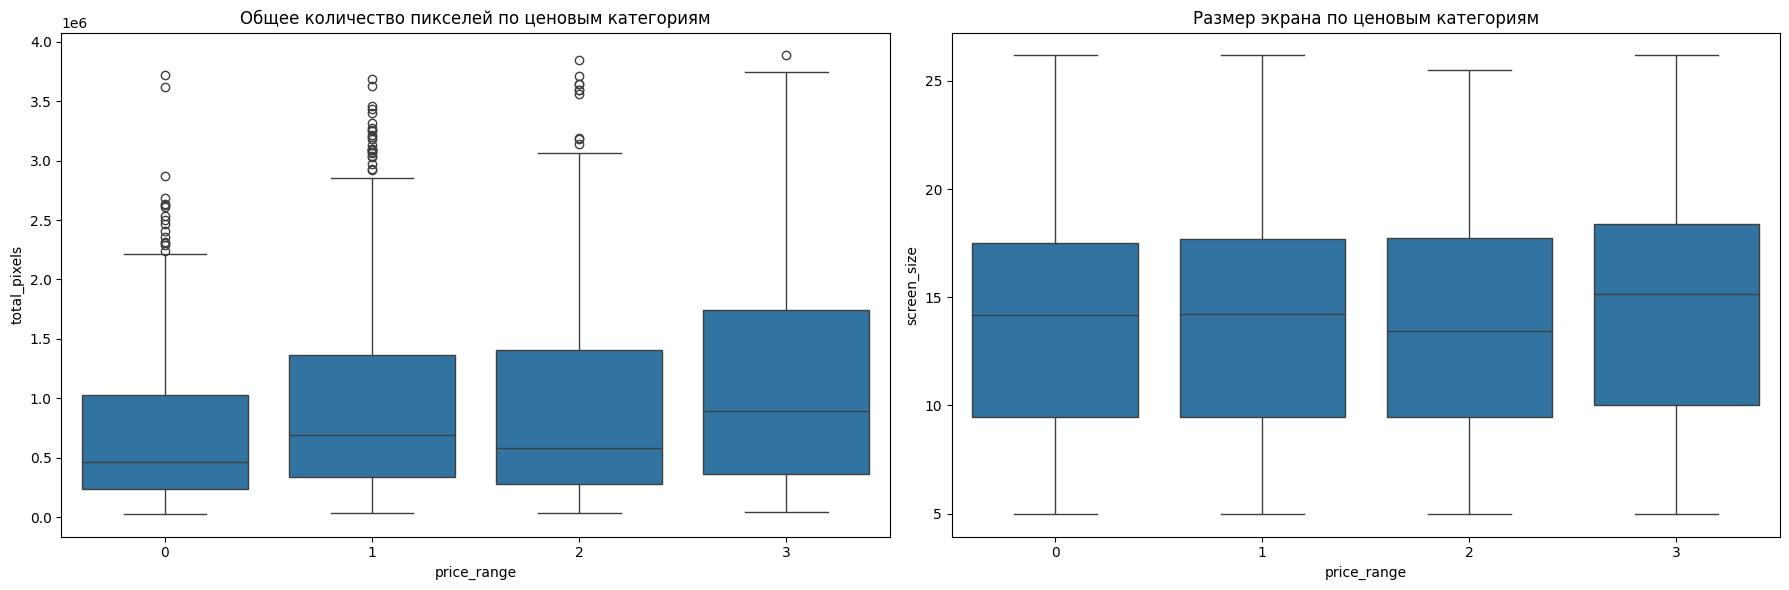

In [19]:
df['total_pixels'] = df['px_height'] * df['px_width']
df['screen_size'] = np.sqrt(df['sc_h']**2 + df['sc_w']**2)


fig, axes = plt.subplots(1, 2, figsize=(18, 6))

sns.boxplot(data=df, x='price_range', y='total_pixels', ax=axes[0])
axes[0].set_title('Общее количество пикселей по ценовым категориям')

sns.boxplot(data=df, x='price_range', y='screen_size', ax=axes[1])
axes[1].set_title('Размер экрана по ценовым категориям')

plt.tight_layout()
plt.savefig('new_features.png')
plt.show()

Добавлены 2 признака - общее количество пикселей и размер экрана (площадь)

Медианное значение экрана для размера экрана для класса 2 чуть ниже чем для остальных классов. Новая переменная не имформативна.

медианные значения для всех классов отличается у признака количества пикселей. Переменная информативна


# Сохранение датасета

In [20]:
with open('../data/clean_train_data.pkl', 'wb') as f:
    pickle.dump(df, f)